# Xopt basic example

An Xopt problem can be described by a simple YAML file. Here we will demonstrate how this is used to optimize a well-known constrained multi-objective test function, TNK.

## TNK test function

The TNK function is defined with:

$n=2$ variables:
$x_i \in [0, \pi], i=1,2$

Objectives:
- $f_i(x) = x_i$

Constraints:
- $g_1(x) = -x_1^2 -x_2^2 + 1 + 0.1 \cos\left(16 \arctan \frac{x_1}{x_2}\right) \le 0$
- $g_2(x) = (x_1 - 1/2)^2 + (x_2-1/2)^2 \le 0.5$

In [1]:
# Import the class
from xopt import Xopt

In [2]:
!mkdir -p temp

The `Xopt` object can be instantiated from a JSON or YAML file, or a dict, with the proper structure.

Here we will make one

In [3]:
# Make a proper input file.
YAML = """
xopt: {}
generator:
    name: random

evaluator:
    name: test_TNK
    function: xopt.resources.test_functions.tnk.evaluate_TNK

vocs:
    variables:
        x1: [0, 3.14159]
        x2: [0, 3.14159]
    objectives: {y1: MINIMIZE, y2: MINIMIZE}
    constraints:
        c1: [GREATER_THAN, 0]
        c2: [LESS_THAN, 0.5]
    linked_variables: {x9: x1}
    constants: {a: dummy_constant}

"""

In [4]:
# create Xopt object.
X = Xopt(YAML)

In [5]:
# Convenient representation of the state.
X


            Xopt 
________________________________           
Version: 0.5.0+77.gb3dbaf1.dirty
Config as YAML:
data: {}
xopt: {asynch: false, strict: false, timeout: null, dump_file: null}
generator: {name: random}
evaluator:
  function: xopt.resources.test_functions.tnk.evaluate_TNK
  function_kwargs: {}
  max_workers: 1
  executor: NormalExecutor
vocs:
  variables:
    x1: [0.0, 3.14159]
    x2: [0.0, 3.14159]
  constraints:
    c1: [GREATER_THAN, 0.0]
    c2: [LESS_THAN, 0.5]
  objectives: {y1: MINIMIZE, y2: MINIMIZE}
  constants: {a: dummy_constant}
  linked_variables: {x9: x1}

In [6]:
Y = """
data: {}
xopt: {asynch: false, strict: false, timeout: null, dump_file: null}
generator: {name: random}
evaluator:
  function: xopt.resources.test_functions.tnk.evaluate_TNK
  function_kwargs: {}
  max_workers: 1
  executor: NormalExecutor
vocs:
  variables:
    x1: [0.0, 3.14159]
    x2: [0.0, 3.14159]
  constraints:
    c1: [GREATER_THAN, 0.0]
    c2: [LESS_THAN, 0.5]
  objectives: {y1: MINIMIZE, y2: MINIMIZE}
  constants: {a: dummy_constant}
  linked_variables: {x9: x1}

"""
X = Xopt(Y)

# Run Random data generation

In [7]:
# Take one step (generate a single point)
X.step()

In [8]:
# examine the results
X.data

,x1,x2,a,x9,y1,y2,c1,c2,some_array,xopt_error,xopt_error_str
1,3.059697,2.63928,dummy_constant,3.059697,3.059697,2.63928,15.289287,11.128569,"[1, 2, 3]",False,


In [9]:
# take a couple of steps and examine the results
for _ in range(10):
    X.step()
X.data

,x1,x2,a,x9,y1,y2,c1,c2,some_array,xopt_error,xopt_error_str
1,3.059697,2.639280,dummy_constant,3.059697,3.059697,2.639280,15.289287,11.128569,"[1, 2, 3]",False,
2,2.766509,0.741438,dummy_constant,2.766509,2.766509,0.741438,7.253229,5.195355,"[1, 2, 3]",False,
3,0.264313,0.408431,dummy_constant,0.264313,0.264313,0.408431,-0.666070,0.063933,"[1, 2, 3]",False,
4,2.887558,1.645673,dummy_constant,2.887558,2.887558,1.645673,10.088294,7.013000,"[1, 2, 3]",False,
5,3.108006,0.487740,dummy_constant,3.108006,3.108006,0.487740,8.977135,6.801844,"[1, 2, 3]",False,
6,1.350810,0.492828,dummy_constant,1.350810,1.350810,0.492828,0.990180,0.723929,"[1, 2, 3]",False,
7,0.833690,1.827971,dummy_constant,0.833690,0.833690,1.827971,2.951957,1.874856,"[1, 2, 3]",False,
8,0.154576,3.065602,dummy_constant,0.154576,0.154576,3.065602,8.352576,6.701631,"[1, 2, 3]",False,
9,0.860272,0.848934,dummy_constant,0.860272,0.860272,0.848934,0.361318,0.251550,"[1, 2, 3]",False,
10,2.060608,1.712834,dummy_constant,2.060608,2.060608,1.712834,6.169890,3.906464,"[1, 2, 3]",False,


# Plotting
Plot the objective results

<AxesSubplot:xlabel='y1', ylabel='y2'>

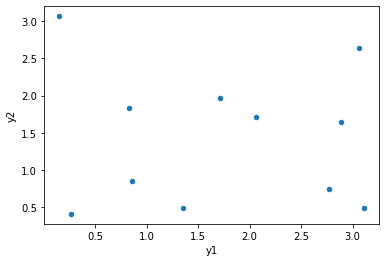

In [10]:
import matplotlib.pyplot as plt

X.data.plot(*X.vocs.objective_names, kind="scatter")

In [11]:
# Cleanup
!rm -r temp

# Alternative initialiation methods

For convenience, if the first (and only) positional argument is present, then Xopt will automatically try to load from JSON, YAML str or files, or as a dict.

In [12]:
import yaml
import json

config  = yaml.safe_load(YAML) 
# All these methods work

X = Xopt(YAML)
X = Xopt(config)
X = Xopt(json.dumps(config, indent=4))
